In [13]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# -----------------
import matplotlib.pyplot as plt
import matplotlib.image as img
# import numpy as np
from scipy.misc import imresize

%matplotlib inline

import os
from os import listdir
from os.path import isfile, join
import shutil
import stat
import collections
from collections import defaultdict

from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

import h5py
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.applications.inception_v3 import preprocess_input
from keras.models import load_model
# -----------------
# import os
proj_dir="/home/hiten/Desktop/Hackathon"
# print(os.listdir(proj_dir))

Using TensorFlow backend.


In [48]:
raw = pd.read_csv(proj_dir+"/label.txt", skipinitialspace=True)
raw.Name

0                   coke 
1                doritos 
2    kind_protein_bar    
3       lays_classic     
4     welch_fruit_snack  
Name: Name, dtype: object

In [34]:
train_dir=proj_dir+"/Images/"
# print(os.listdir(train_dir))

sorted food dirs:  ['n0', 'n1', 'n2', 'n3', 'n4']
n0
n1
n2
n3
n4


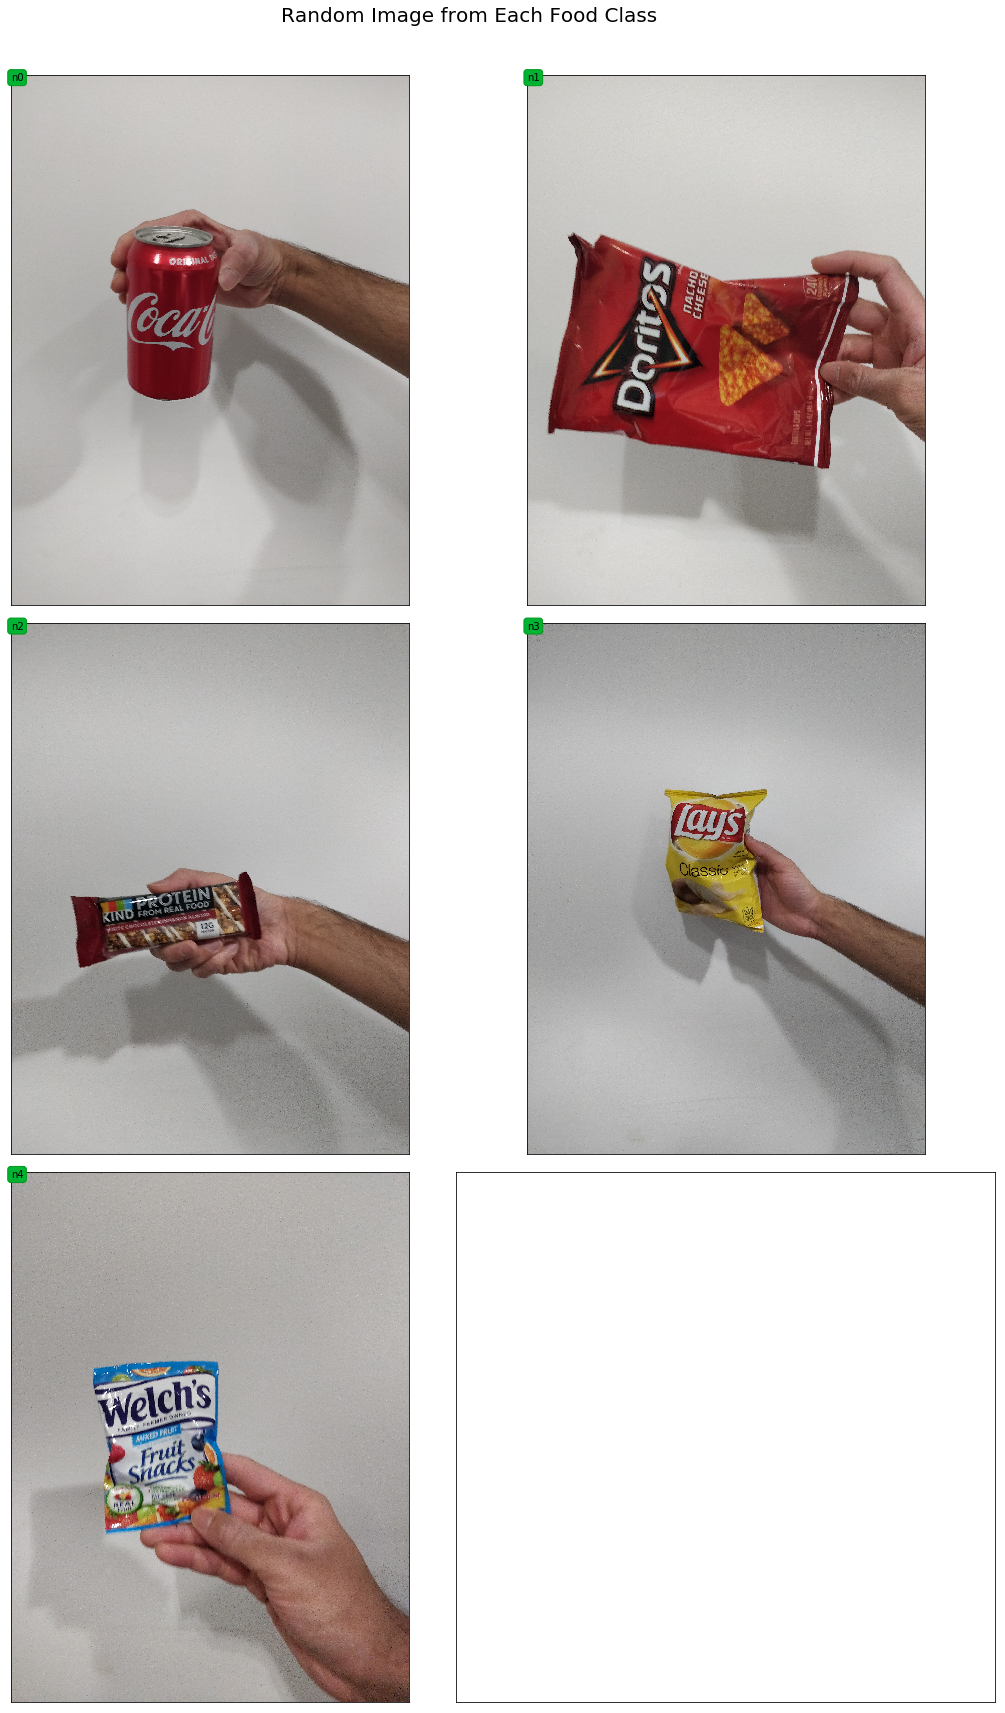

In [38]:
rows = 3
cols = 2
fig, ax = plt.subplots(rows, cols, frameon=False, figsize=(15, 25))
fig.suptitle('Random Image from Each Food Class', fontsize=20)
sorted_food_dirs = sorted(os.listdir(train_dir))
print("sorted food dirs: ", sorted_food_dirs)
for i in range(rows):
    for j in range(cols):
        try:
            food_dir = sorted_food_dirs[i*cols + j]
            print(food_dir)
        except:
            break
        all_files = os.listdir(os.path.join(train_dir, food_dir))
        rand_img = np.random.choice(all_files)
        img = plt.imread(os.path.join(train_dir, food_dir, rand_img))
        ax[i][j].imshow(img)
        ec = (0, .6, .1)
        fc = (0, .7, .2)
        ax[i][j].text(0, -20, food_dir, size=10, rotation=0,
                ha="left", va="top", 
                bbox=dict(boxstyle="round", ec=ec, fc=fc))
plt.setp(ax, xticks=[], yticks=[])
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

In [39]:
# Setup multiprocessing pool
# Do this early, as once images are loaded into memory there will be Errno 12
# http://stackoverflow.com/questions/14749897/python-multiprocessing-memory-usage
import multiprocessing as mp

num_processes = 6
pool = mp.Pool(processes=num_processes)

In [40]:
class_to_ix = {}
ix_to_class = {}
with open(proj_dir+"/label.txt", 'r') as txt:
    classes = [l.strip() for l in txt.readlines()]
    class_to_ix = dict(zip(classes, range(len(classes))))
    ix_to_class = dict(zip(range(len(classes)), classes))
    class_to_ix = {v: k for k, v in ix_to_class.items()}
sorted_class_to_ix = collections.OrderedDict(sorted(class_to_ix.items()))

In [50]:
class_to_ix

{'Label,  Name': 0,
 'n0   , coke': 1,
 'n1   , doritos': 2,
 'n2   , kind_protein_bar': 3,
 'n3   , lays_classic': 4,
 'n4   , welch_fruit_snack': 5}

In [49]:
ix_to_class

{0: 'Label,  Name',
 1: 'n0   , coke',
 2: 'n1   , doritos',
 3: 'n2   , kind_protein_bar',
 4: 'n3   , lays_classic',
 5: 'n4   , welch_fruit_snack'}

In [51]:
sorted_class_to_ix

OrderedDict([('Label,  Name', 0),
             ('n0   , coke', 1),
             ('n1   , doritos', 2),
             ('n2   , kind_protein_bar', 3),
             ('n3   , lays_classic', 4),
             ('n4   , welch_fruit_snack', 5)])